In [167]:
pip install quandl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
import quandl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [184]:
# df = quandl.get("WIKI/AAPL")
df = pd.read_csv('FB.csv')
df = df[['Adj Close']]
df

,Adj Close
0,130.979996
1,130.839996
2,133.229996
3,130.320007
4,130.979996
...,...
1181,33.029999
1182,32.000000
1183,31.000000
1184,34.029999


In [185]:
#A variable for predicting 'n' days out into the future
forecast_out = 30
#create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
df

,Adj Close,Prediction
0,130.979996,119.089996
1,130.839996,119.239998
2,133.229996,119.870003
3,130.320007,120.570000
4,130.979996,120.209999
...,...,...
1181,33.029999,NaN
1182,32.000000,NaN
1183,31.000000,NaN
1184,34.029999,NaN


In [186]:
# creating x dataset
#convert data to numpy Array
x = np.array(df.drop(['Prediction'],1))
#remove last 'n' rows
x = x[:-forecast_out]

<ipython-input-186-d24b43b624dd>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['Prediction'],1))


In [187]:
#create dependent data set y
#converting the dataframe to numpy array('All values including NAN's)
y= np.array(df['Prediction'])
y = y[:-forecast_out]

In [188]:
#split the data into 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [189]:
#train using support vector machine
svr = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [190]:
forest = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=4)
forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=4, random_state=1)

In [191]:
# x_future = df.drop(['Prediction'],1)[:-forecast_out]
# x_future = x_future.tail(forecast_out)
# x_future = np.array(x_future)

In [192]:
svm_confidence = svr.score(x_test, y_test)
svm_confidence

0.9736306363588947

In [193]:
forest_confidence =forest.score(x_test, y_test)
forest_confidence

0.968729005271787

In [194]:
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast

<ipython-input-194-6db2455b6e63>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]


array([[31.1     ],
       [31.360001],
       [32.23    ],
       [33.099998],
       [32.060001],
       [33.049999],
       [31.84    ],
       [31.6     ],
       [31.91    ],
       [31.41    ],
       [30.01    ],
       [28.290001],
       [27.27    ],
       [27.4     ],
       [27.01    ],
       [27.1     ],
       [26.309999],
       [26.809999],
       [25.870001],
       [26.9     ],
       [27.719999],
       [29.6     ],
       [28.190001],
       [28.84    ],
       [31.91    ],
       [33.029999],
       [32.      ],
       [31.      ],
       [34.029999],
       [38.23    ]])

In [195]:
svr_prediction = svr.predict(x_forecast)
svr_prediction

forest_prediction = forest.predict(x_forecast)
forest_prediction

array([32.2039993 , 27.8416    , 31.1909995 , 26.5239997 , 31.1909995 ,
       30.2439993 , 27.5130005 , 27.797     , 28.5230003 , 30.54718333,
       27.7419998 , 27.4259998 , 26.7779992 , 27.3440001 , 26.7868331 ,
       25.534999  , 23.983     , 24.0119993 , 23.759999  , 27.4699995 ,
       22.2160001 , 26.6929993 , 26.9860008 , 24.7260001 , 28.5230003 ,
       30.2439993 , 31.1909995 , 27.451     , 24.6719999 , 25.155999  ])

<ipython-input-197-9f7e14683de1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


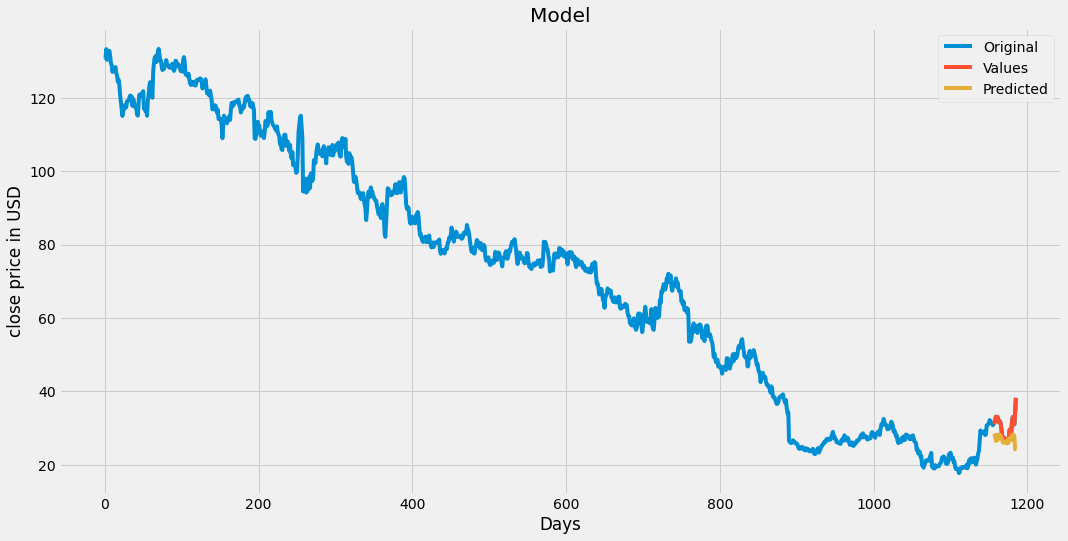

In [197]:
predictions = svr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close price in USD')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Original', 'Values', 'Predicted'])
plt.show()

<ipython-input-198-4cce7fbffce0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


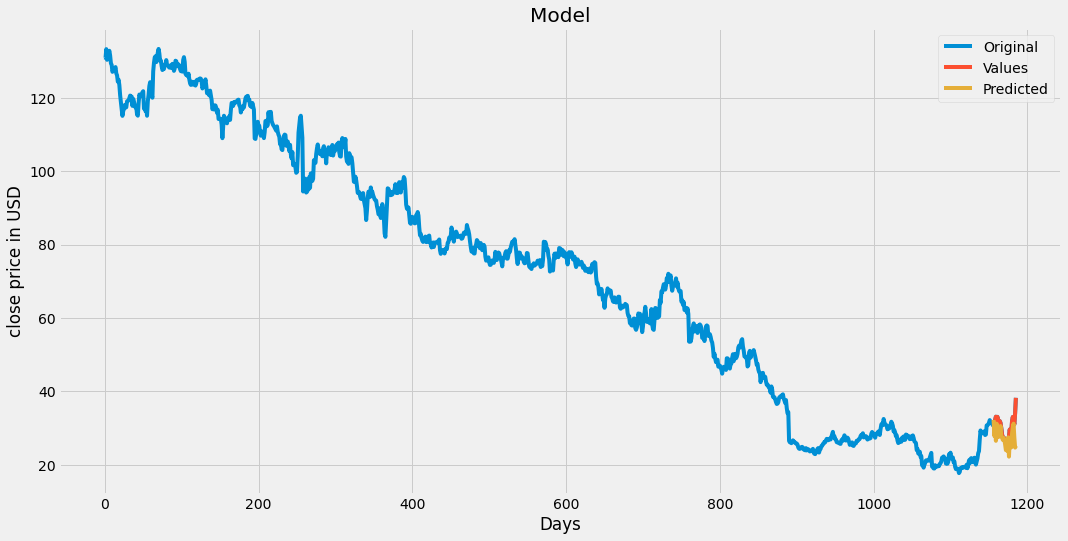

In [198]:
predictions = forest_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close price in USD')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Original', 'Values', 'Predicted'])
plt.show()